# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

### Importing required Libraries

In [198]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv("for_training.csv",)
df_copy=pd.read_csv("for_training_copy.csv")

In [44]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train) # overfitting var mı yok mu kıyaslamak için
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

### Training

##**Train Test split for regression**

In [38]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df_copy.drop("Unnamed: 0", axis=1, inplace=True)

In [40]:
X = df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(df_copy['Rented_Bike_Count'])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


### LINEAR REGRESSION

In [48]:
from sklearn.linear_model import LinearRegression
lm_reg= LinearRegression().fit(X_train, y_train)
lm_reg.score(X_train, y_train)

0.7722101548255267

In [49]:
train_val(lm_reg, X_train, y_train, X_test, y_test)

,train,test
R2,0.772210,0.789352
mae,4.474024,4.410178
mse,35.077513,33.275331
rmse,5.922627,5.768477


### Cross-Validation

In [50]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [51]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                              0.767108
test_neg_mean_absolute_error        -4.511939
test_neg_mean_squared_error        -35.784303
test_neg_root_mean_squared_error    -5.977389
dtype: float64

In [54]:
y_pred = lm_reg.predict(X_test)
lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [55]:
lm_R2

0.7893518482962683

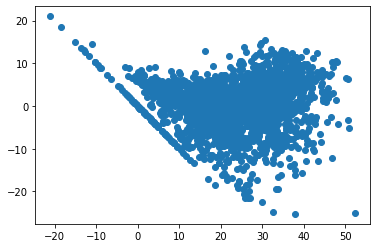

In [56]:
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

In [207]:
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [208]:
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

### LASSO REGRESSION

In [59]:
alpha_space = np.linspace(0.01, 100, 100)

In [67]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model= GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)
lasso_grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [79]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.771459,0.788662
mae,4.483975,4.420412
mse,35.193113,33.384376
rmse,5.932378,5.777921


In [80]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### RIDGE REGRESSION


In [85]:
ridge_model = Ridge(random_state=42)

param_grid = {'alpha':alpha_space}

ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)
ridge_grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [86]:
ridge_grid_model.best_estimator_

Ridge(alpha=1.02, random_state=42)

In [89]:
ridge = Ridge(alpha=1.02, random_state=42).fit(X_train, y_train)

In [88]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.771459,0.788662
mae,4.483975,4.420412
mse,35.193113,33.384376
rmse,5.932378,5.777921


In [90]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### Decision Tree

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [96]:
regressor = DecisionTreeRegressor(random_state=42)

In [127]:
parameters={"splitter":["best","random"],
            "max_depth" : [None,1,3,5,10],
           "min_samples_leaf":[1,2,3,4,5,6,7],
           "min_samples_split" : [2,3,5,6,7,8,9] }

In [128]:
tuning_model=GridSearchCV(regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=3)

In [129]:
tuning_model.fit(X_train,y_train)

Fitting 5 folds for each of 490 candidates, totalling 2450 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-23.926 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-22.813 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-25.038 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-25.388 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-27.147 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-22.173 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-23.546 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-23.3

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 1, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [130]:
tuning_model.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'splitter': 'random'}

In [131]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=None,min_samples_leaf=1,min_samples_split=7,splitter='random')

In [132]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_split=7, splitter='random')

In [133]:
train_val(tuned_hyper_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.969067,0.856724
mae,1.271150,2.908934
mse,4.763318,22.632744
rmse,2.182503,4.757388


In [134]:
y_pred = tuned_hyper_model.predict(X_test)
des_R2 = r2_score(y_test, y_pred)
des_mae = mean_absolute_error(y_test, y_pred)
des_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### RANDOM FOREST

In [135]:
regres = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [136]:
parameters1={"n_estimators":[200,500],
            "max_depth" : [None,4,5,6,7],
           "min_samples_leaf":[2,3,4],
           "min_samples_split" : [3,5,8,9],
            "max_features":["auto",X.shape[1]/3,2]
            }

In [137]:
random_model=GridSearchCV(regres,param_grid=parameters1,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [138]:
random_model.fit(X_train,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=-12.293 total time=   5.2s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=-13.435 total time=   5.8s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=-12.864 total time=   4.8s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=500;, score=-12.242 total time=  13.1s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=500;, score=-13.268 total time=  13.3s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=500;, score=-12.771 total time=  13.8s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=10, random_state=0),
             param_grid={'max_depth': [None, 4, 5, 6, 7],
                         'max_features': ['auto', 15.666666666666666, 2],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [3, 5, 8, 9],
                         'n_estimators': [200, 500]},
             scoring='neg_mean_squared_error', verbose=3)

In [139]:
random_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 500}

In [140]:
random_hyper_model= RandomForestRegressor(n_estimators= 500,max_depth=None,min_samples_leaf=2,min_samples_split=3,max_features='auto')

In [141]:
random_hyper_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=500)

In [142]:
train_val(random_hyper_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.981611,0.917901
mae,1.032327,2.235635
mse,2.831716,12.968906
rmse,1.682770,3.601237


In [143]:
y_pred = random_hyper_model.predict(X_test)
ran_R2 = r2_score(y_test, y_pred)
ran_mae = mean_absolute_error(y_test, y_pred)
ran_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### GRADIENT BOOSTING

In [147]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [148]:
y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [149]:
train_val(gb_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.878902,0.865228
mae,3.269004,3.492859
mse,18.648017,21.289442
rmse,4.318335,4.614048


In [150]:
y_pred = gb_model.predict(X_test)
ran_R2 = r2_score(y_test, y_pred)
ran_mae = mean_absolute_error(y_test, y_pred)
ran_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [151]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [152]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [153]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [154]:
gb_optimal_model = gb_grid.best_estimator_

In [157]:
gb_optimal_model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [158]:
y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [160]:
train_val(gb_optimal_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.951590,0.921544
mae,1.848919,2.400741
mse,7.454740,12.393403
rmse,2.730337,3.520427


In [161]:
y_pred = gb_optimal_model.predict(X_test)
Xg_R2 = r2_score(y_test, y_pred)
Xg_mae = mean_absolute_error(y_test, y_pred)
Xg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### LSTM

In [162]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [163]:
df

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0


In [167]:
df1=pd.read_csv("SeoulBikeData.csv",parse_dates=["Date"],index_col=["Date"],encoding= 'unicode_escape')

In [168]:
df1

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [171]:
df1

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [172]:
df1=df1.drop(['Dew point temperature(°C)'],axis=1)

In [175]:
categorical_features=list(df1.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [176]:
df_copy1 =df1

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy1 = one_hot_encoding(df_copy1, col)
df_copy1.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
Date,,,,,,,,,,,,,,
2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1,1,1
2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1,1,1
2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,1,1
2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,1,1
2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1,1,1


In [187]:
train_size=int(np.round(df_copy1.shape[0]*.9))
test_size=df_copy1.shape[0]-train_size

In [188]:
train,test=df_copy1.iloc[0:train_size],df_copy1.iloc[train_size : ]
print(train.shape[0],test.shape[0])

7884 876


In [189]:
f_scaler=RobustScaler()
target_scaler=RobustScaler()

In [190]:
df_copy1.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
Date,,,,,,,,,,,,,,
2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1,1,1


In [192]:
f_columns=["Temperature(°C)","Humidity(%)","Wind speed (m/s)","Visibility (10m)"]
train.loc[:,f_columns]=f_scaler.fit_transform(train[f_columns])
train["Rented Bike Count"]=target_scaler.fit_transform(train[["Rented Bike Count"]])

test.loc[:,f_columns]=f_scaler.transform(test[f_columns])
test["Rented Bike Count"]=target_scaler.transform(test[["Rented Bike Count"]])

In [193]:
def  create(X,y,time_steps):
  Xs,ys=[],[]
  for i in range(len(X)-time_steps):
    v=X.iloc[i:(i+time_steps)].values
    Xs.append(v)
    ys.append(y.iloc[i+time_steps])
  return np.array(Xs),np.array(ys)

In [195]:
time_steps=24

X_train,y_train=create(train,train["Rented Bike Count"], time_steps)
X_test,y_test=create(test,test["Rented Bike Count"],time_steps)

In [196]:
n_features=X_train.shape[2]

In [202]:
model=Sequential()

model.add(Bidirectional(LSTM(units=118,input_shape=(time_steps,n_features))))

model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [203]:
early=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)

In [204]:
model.fit(X_train,y_train,
          epochs=30,
          batch_size=32,
          validation_split=0.3,     
      callbacks=[early])

Epoch 1/30
172/172 [==============================] - 21s 89ms/step - loss: 0.1777 - val_loss: 0.1614
Epoch 2/30
172/172 [==============================] - 10s 56ms/step - loss: 0.0923 - val_loss: 0.1243
Epoch 3/30
172/172 [==============================] - 12s 69ms/step - loss: 0.0710 - val_loss: 0.0993
Epoch 4/30
172/172 [==============================] - 14s 79ms/step - loss: 0.0613 - val_loss: 0.0733
Epoch 5/30
172/172 [==============================] - 11s 66ms/step - loss: 0.0544 - val_loss: 0.0673
Epoch 6/30
172/172 [==============================] - 13s 73ms/step - loss: 0.0450 - val_loss: 0.0522
Epoch 7/30
172/172 [==============================] - 11s 66ms/step - loss: 0.0389 - val_loss: 0.0459
Epoch 8/30
172/172 [==============================] - 16s 92ms/step - loss: 0.0343 - val_loss: 0.0445
Epoch 9/30
172/172 [==============================] - 12s 68ms/step - loss: 0.0337 - val_loss: 0.0450
Epoch 10/30
172/172 [==============================] - 12s 69ms/step - loss: 0.030

In [206]:
y_pred=model.predict(X_test)

27/27 [==============================] - 1s 17ms/step


In [205]:
def ev_metrics1(act,pred):
  rmse = np.sqrt(mean_squared_error(act,pred))
  mae=mean_absolute_error(act,pred)
  mse=mean_squared_error(act,pred)
  score=r2_score(act,pred)
  return print("r2_score",score,"mae:",mse,"rmse:",rmse)

In [209]:
ev_metrics1(y_test,y_pred)

r2_score 0.9551686160640979 mae: 0.013043326907748716 rmse: 0.1142073855219036


In [210]:
y_pred=model.predict(X_test)
LSTM_R2 = r2_score(y_test, y_pred)
LSTM__mae = mean_absolute_error(y_test, y_pred)
LSTM__rmse = np.sqrt(mean_squared_error(y_test, y_pred))

27/27 [==============================] - 0s 17ms/step


In [216]:
train_val(model, X_train, y_train, X_test, y_test)

246/246 [==============================] - 6s 25ms/step


,train,test
R2,0.972202,0.955169
mae,0.072575,0.079755
mse,0.015172,0.013043
rmse,0.123174,0.114207


In [217]:
y_train_inv=target_scaler.inverse_transform(y_train.reshape(1,-1))
y_test_inv=target_scaler.inverse_transform(y_test.reshape(1,-1))
y_pred_inv=target_scaler.inverse_transform(y_pred)

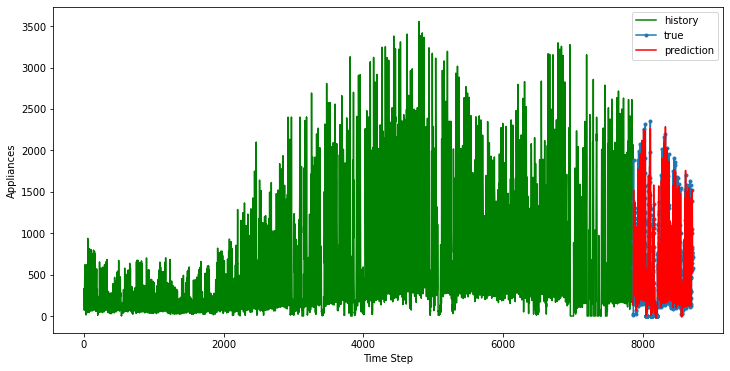

In [219]:
 plt.figure(figsize=(12,6))
plt.plot(np.arange(0,len(y_train)),y_train_inv.flatten(),"g",label="history")
plt.plot(np.arange(len(y_train),len(y_train)+len(y_test)),y_test_inv.flatten(),marker=".",label="true")
plt.plot(np.arange(len(y_train),len(y_train)+len(y_test)),y_pred_inv.flatten(),"r",label="prediction")
plt.ylabel("Appliances")
plt.xlabel("Time Step")
plt.legend()
plt.show();

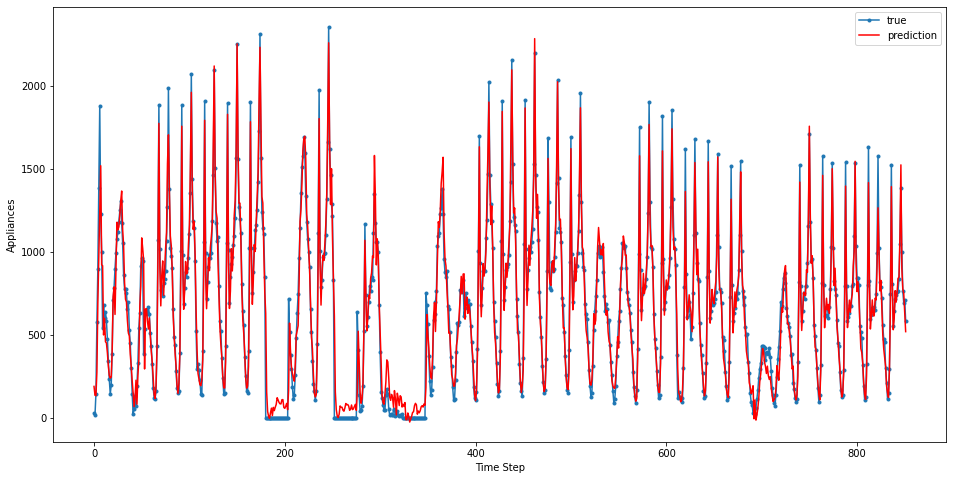

In [220]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(),marker=".",label="true")
plt.plot(y_pred_inv.flatten(),"r",label="prediction")
plt.ylabel("Appliances")
plt.xlabel("Time Step")
plt.legend();

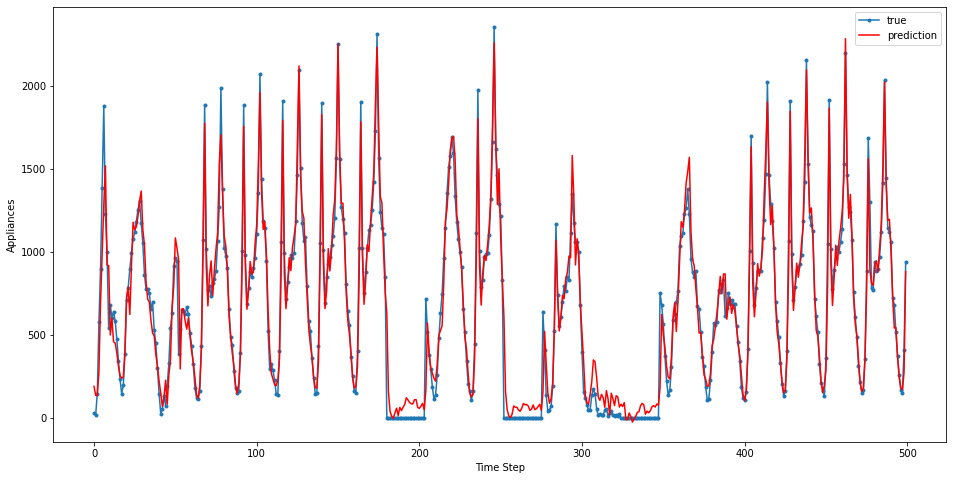

In [221]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten()[0:500],marker=".",label="true")
plt.plot(y_pred_inv.flatten()[0:500],"r",label="prediction")
plt.ylabel("Appliances")
plt.xlabel("Time Step")
plt.legend();

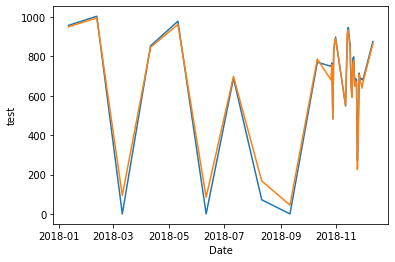

In [222]:
a=pred_test.resample("24H").mean()
sns.lineplot(x=a.index,y="test",data=a)
sns.lineplot(x=a.index,y="prediction",data=a);

### Compare

In [213]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "Decission_m": {"r2_score": des_R2, 
 "mae": des_mae, 
 "rmse": des_rmse},

"Random_m": {"r2_score": ran_R2, 
 "mae": ran_mae, 
 "rmse": ran_rmse},

 "LSTM_m": {"r2_score": LSTM_R2, 
 "mae": LSTM__mae, 
 "rmse": LSTM__rmse},

 "XG": {"r2_score": Xg_R2, 
 "mae": Xg_mae, 
 "rmse":Xg_rmse},
         
 #"final_m": {"r2_score": fm_R2, 
 #"mae": fm_mae , 
 #"rmse": fm_rmse}
 }
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.789352,4.410178,5.768477
ridge_m,0.789251,4.412603,5.769859
lasso_m,0.788662,4.420412,5.777921
Decission_m,0.856724,2.908934,4.757388
Random_m,0.865228,3.492859,4.614048
LSTM_m,0.955169,0.079755,0.114207
XG,0.921544,2.400741,3.520427


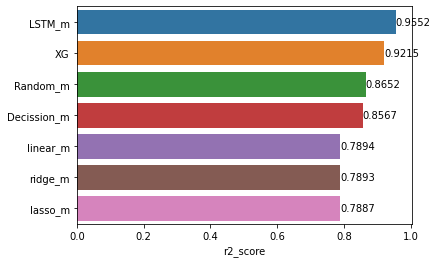

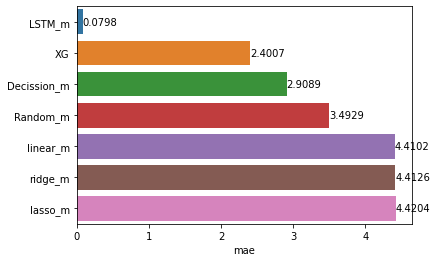

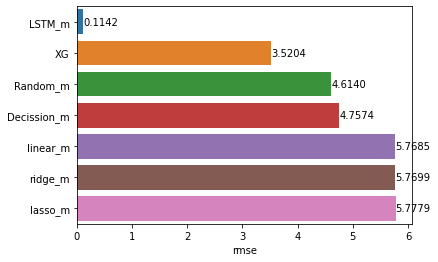

In [214]:
#metrics = scores.columns
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

### CONCLUSION

• We can say, there is overfittin in Random Forest and Decision Tree. 

• XG-Boost has well success but LSTM has better success than it. 

• Feature Importance value for Random Forest and Gradient Boost are different.

• We can deploy this model.

However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.